In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import os

In [53]:
# File to Load (Remember to Change These)
file_to_load = 'flights_tickets_serp2019-07-15.csv' 

# Read Purchasing File and store into Pandas data frame
first_flights_data = pd.read_csv(file_to_load)

In [42]:
first_flights_data.head()

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,formattedUrl,...,count,startIndex,inputEncoding,outputEncoding,safe,cx,gl,searchTime,formattedSearchTime,formattedTotalResults
0,flights to hong kong,1,Cheap Flights to Hong Kong (HKG) from $418 - K...,"Find flights to Hong Kong on XiamenAir, Cathay...",www.kayak.com,https://www.kayak.com/flight-routes/United-Sta...,2019-07-15 11:26:35.576675+00:00,150000000,W42baDpas_gJ,https://www.kayak.com/flight-routes/United.../...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.499167,0.5,"150,000,000"
1,flights to hong kong,2,Flights to Hong Kong (HKG) | Cathay Pacific,Find & book great deals on Hong Kong (HKG) Fli...,www.cathaypacific.com,https://www.cathaypacific.com/destinations/en_...,2019-07-15 11:26:35.576675+00:00,150000000,UEdjkoYlsQsJ,https://www.cathaypacific.com/destinations/en....,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.499167,0.5,"150,000,000"
2,flights to hong kong,3,"$125 Flights to Hong Kong, China (HKG) - TripA...",Book Cheap Flights to Hong Kong: Search and co...,www.tripadvisor.com,https://www.tripadvisor.com/Flights-g294217-Ho...,2019-07-15 11:26:35.576675+00:00,150000000,5jsjhmxgxvkJ,https://www.tripadvisor.com/Flights-g294217-Ho...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.499167,0.5,"150,000,000"
3,flights to hong kong,4,"Cheap Flights to Hong Kong SAR, Asia (HKG Airp...",Flights to Hong Kong SAR from airlines such as...,www.expedia.com,https://www.expedia.com/Cheap-Flights-To-Hong-...,2019-07-15 11:26:35.576675+00:00,150000000,iEmRbX0P8CAJ,https://www.expedia.com/Cheap-Flights-To-Hong-...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.499167,0.5,"150,000,000"
4,flights to hong kong,5,$406 Cheap Flights to Hong Kong International ...,Find cheap flights to Hong Kong International ...,www.skyscanner.com,https://www.skyscanner.com/flights-to/hkg/chea...,2019-07-15 11:26:35.576675+00:00,150000000,EI78TI4Q1qYJ,https://www.skyscanner.com/flights-to/hkg/chea...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.499167,0.5,"150,000,000"


In [54]:
nRowsRead = 4000 # specify 'None' if want to read whole file
# flights_tickets_serp2019-07-15.csv has 4000 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('flights_tickets_serp2019-07-15.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'flights_tickets_serp2019-07-15.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4000 rows and 26 columns


In [55]:
first_flights_data.sort_values(['displayLink'])

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,formattedUrl,...,count,startIndex,inputEncoding,outputEncoding,safe,cx,gl,searchTime,formattedSearchTime,formattedTotalResults
3983,tickets to chiba,4,Chiba 2019 | Red Bull Air Race,Chiba 2018. Mihai Stetcu/RBAR. Japan. 7 - 8 Se...,airrace.redbull.com,https://airrace.redbull.com/en/event/chiba-2019,2019-07-15 11:26:51.398848+00:00,3380000,hTXfi6Q6SMsJ,https://airrace.redbull.com/en/event/chiba-2019,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,uk,0.279394,0.28,"3,380,000"
1983,tickets to chiba,4,Chiba 2019 | Red Bull Air Race,Chiba 2018. Mihai Stetcu/RBAR. Japan. 7 - 8 Se...,airrace.redbull.com,https://airrace.redbull.com/en/event/chiba-2019,2019-07-15 11:26:42.933338+00:00,2660000,hTXfi6Q6SMsJ,https://airrace.redbull.com/en/event/chiba-2019,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.293874,0.29,"2,660,000"
1999,tickets to nice,10,Tickets,If this is your first time buying OGC Nice tic...,billetterie.ogcnice.com,https://billetterie.ogcnice.com/account/login?...,2019-07-15 11:26:42.972078+00:00,233000000,0g1WH0pdKvUJ,https://billetterie.ogcnice.com/account/login?...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.318477,0.32,"233,000,000"
3999,tickets to nice,10,Tickets,If this is your first time buying OGC Nice tic...,billetterie.ogcnice.com,https://billetterie.ogcnice.com/account/login?...,2019-07-15 11:26:51.438794+00:00,237000000,0g1WH0pdKvUJ,https://billetterie.ogcnice.com/account/login?...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,uk,0.257688,0.26,"237,000,000"
1375,tickets to johor bahru,6,How to Take Train to JB from Singapore (2019):...,"Apr 25, 2019 ... Confession: I'm a train otaku...",blog.moneysmart.sg,https://blog.moneysmart.sg/travel/ktm-train-to...,2019-07-15 11:26:40.203418+00:00,41000000,n6Yw1TsiVQQJ,https://blog.moneysmart.sg/travel/ktm-train-to...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.327211,0.33,"41,000,000"
3376,tickets to johor bahru,7,How to Take Train to JB from Singapore (2019):...,25 Apr 2019 ... Confession: I'm a train otaku....,blog.moneysmart.sg,https://blog.moneysmart.sg/travel/ktm-train-to...,2019-07-15 11:26:48.537113+00:00,42200000,n6Yw1TsiVQQJ,https://blog.moneysmart.sg/travel/ktm-train-to...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,uk,0.312028,0.31,"42,200,000"
1498,tickets to toronto,9,Cheap Flights to Toronto from $63 | Jetcost,Cheap flights to Toronto (Canada). Compare and...,ca.jetcost.com,https://ca.jetcost.com/en/flights/canada/toronto/,2019-07-15 11:26:40.858657+00:00,180000000,AjdkMvXLje0J,https://ca.jetcost.com/en/flights/canada/toronto/,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.502103,0.50,"180,000,000"
3768,tickets to vancouver,9,Cheap Flights to Vancouver from $49 | Jetcost,Cheap flights to Vancouver (Canada). Compare a...,ca.jetcost.com,https://ca.jetcost.com/en/flights/canada/vanco...,2019-07-15 11:26:50.300314+00:00,146000000,B49_wPqpKLsJ,https://ca.jetcost.com/en/flights/canada/vanco...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,uk,0.374676,0.37,"146,000,000"
2508,flights to hanoi,9,Cheap flights to Hanoi | Direct flights to Hanoi,"Looking for cheap, direct flights to Hanoi? Di...",directflights.com,https://directflights.com/cheapflights/Hanoi-f...,2019-07-15 11:26:44.899028+00:00,11700000,57WEaXULqWQJ,https://directflights.com/cheapflights/Hanoi-f...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,uk,0.392891,0.39,"11,700,000"
2717,flights to jerusalem,8,"Cheap, direct flights to Jerusalem | Directfli...","Looking for cheap, direct flights to Jerusalem...",directflights.com,https://directflights.com/cheapflights/jerusal...,2019-07-15 11:26:45.698915+00:00,19800000,v5uDz0UQUn4J,https://directflights.com/cheapflights/jerusal...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,uk,0.366063,0.37,"19,800,000"


In [66]:
first_flights_data[["displayLink", "searchTime"]].head()

,displayLink,searchTime
0,www.kayak.com,0.499167
1,www.cathaypacific.com,0.499167
2,www.tripadvisor.com,0.499167
3,www.expedia.com,0.499167
4,www.skyscanner.com,0.499167


In [59]:
avg_time = first_flights_data.groupby(['displayLink']).mean()["searchTime"]
avg_time.head()

displayLink
airrace.redbull.com        0.286634
billetterie.ogcnice.com    0.288083
blog.moneysmart.sg         0.319620
ca.jetcost.com             0.438389
directflights.com          0.362886
Name: searchTime, dtype: float64

In [60]:
# File to Load (Remember to Change These)
second_file_to_load ='flights_tickets_serp2019-07-01.csv'

# Read Purchasing File and store into Pandas data frame
second_flights_data = pd.read_csv(second_file_to_load)

In [48]:
second_flights_data.head()

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,formattedUrl,...,count,startIndex,inputEncoding,outputEncoding,safe,cx,gl,searchTime,formattedSearchTime,formattedTotalResults
0,flights to hong kong,1,Cheap Flights to Hong Kong (HKG) from $432 - K...,"Find flights to Hong Kong on United Airlines, ...",www.kayak.com,https://www.kayak.com/flight-routes/United-Sta...,2019-07-01 11:26:20.849235+00:00,182000000,W42baDpas_gJ,https://www.kayak.com/flight-routes/United.../...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.489387,0.49,"182,000,000"
1,flights to hong kong,2,"$130 Flights to Hong Kong, China (HKG) - TripA...",Book Cheap Flights to Hong Kong: Search and co...,www.tripadvisor.com,https://www.tripadvisor.com/Flights-g294217-Ho...,2019-07-01 11:26:20.849235+00:00,182000000,5jsjhmxgxvkJ,https://www.tripadvisor.com/Flights-g294217-Ho...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.489387,0.49,"182,000,000"
2,flights to hong kong,3,Flights to Hong Kong (HKG) | Cathay Pacific,Find & book great deals on Hong Kong (HKG) Fli...,www.cathaypacific.com,https://www.cathaypacific.com/destinations/en_...,2019-07-01 11:26:20.849235+00:00,182000000,UEdjkoYlsQsJ,https://www.cathaypacific.com/destinations/en....,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.489387,0.49,"182,000,000"
3,flights to hong kong,4,"Cheap Flights to Hong Kong SAR, Asia (HKG Airp...",Book a flight & unlock up to 42% off select ho...,www.expedia.com,https://www.expedia.com/Cheap-Flights-To-Hong-...,2019-07-01 11:26:20.849235+00:00,182000000,iEmRbX0P8CAJ,https://www.expedia.com/Cheap-Flights-To-Hong-...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.489387,0.49,"182,000,000"
4,flights to hong kong,5,$423 Cheap Flights to Hong Kong International ...,Find cheap flights to Hong Kong International ...,www.skyscanner.com,https://www.skyscanner.com/flights-to/hkg/chea...,2019-07-01 11:26:20.849235+00:00,182000000,EI78TI4Q1qYJ,https://www.skyscanner.com/flights-to/hkg/chea...,...,10,1,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.489387,0.49,"182,000,000"


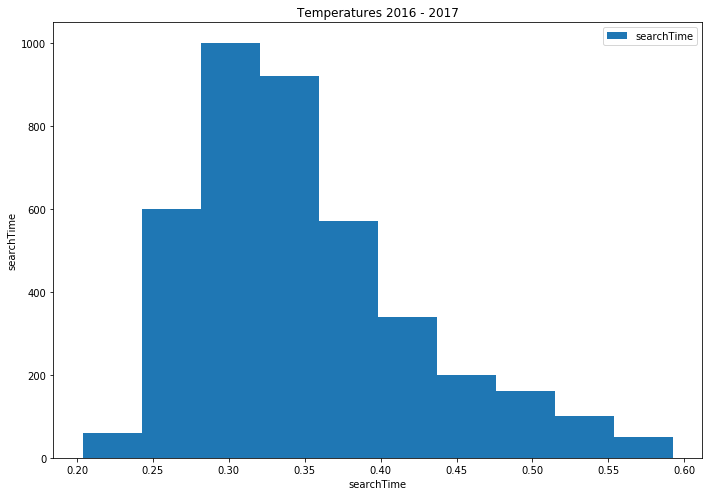

In [69]:
#plot data
first_flights_data_df = pd.DataFrame(first_flights_data, columns = ["displayLink", "searchTime"])
first_flights_data_df.head()

fig, ax = plt.subplots(figsize = (10,7))
first_flights_data_df.plot.hist(ax = ax)

#set title and labels
ax.set_xlabel('searchTime')
ax.set_ylabel('searchTime')
ax.set_title("Temperatures 2016 - 2017")

#save figure
# plt.savefig("..//Advanced-Data-Storage-and-Retrieval/Station with highest temperature Analysis.png")

#plot figure
plt.tight_layout()
plt.show()


In [68]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(05/31/2019)", weight='semibold',fontsize=14)
plt.xlabel("Latitude", weight='semibold',fontsize=12)
plt.ylabel("Max. Temperature (F)", weight='semibold',fontsize=12)
plt.grid(True)

plt.savefig('../PythonAPI/Max_Temp vs. Latitude.png', dpi=150)


plt.show()

NameError: name 'weather_data' is not defined

In [ ]:
#plot data
fig, ax = plt.subplots(figsize = (15, 7))
# prcp_year_df.plot(x='date',y='prcp', figsize = (18,8), rot = 340)
precip_df.plot(ax = ax, x_compat = True, rot =340)

#set title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_title("Precipitation 8/24/2016 - 8/23/2017")

#save figure
# plt.savefig("Images/precip.png")

#plot figure
plt.tight_layout()
plt.show()


# x_axis = precip_df['date']
# tick_locations = [value for value in x_axis]
# y_axis = precip_df['prcp']
# plt.bar(x_axis, y_axis, color=["blue"], alpha=1, align="center")


# # Create Ticks for Bar Chart's x_axis
# plt.xticks(tick_locations, x_axis, rotation=85, fontsize=12)

# # Set Labels & Title
# plt.ylabel("Precipitation", fontsize=12)
# plt.xlabel("Date",fontsize=12)
# plt.title("Average Employee Salary by Title",fontsize=12)

# # plt.text(45, 35, "Employee Titles", fontsize=12, alpha=0.75 )

# # Save Figure
plt.savefig("..//Advanced-Data-Storage-and-Retrieval/Precipitation Analysis.png")

# # Show plot
# plt.show()